In [131]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pywt
import mne
import sys

sys.path.append('../utils')
from ERP_utils import *
from update_sub_lists import *
import glob
import os

### Parameters

In [154]:
good_listen_subjects, good_motor_subjects, musicians, nonmusicians = load_subject_lists()

task = 'error'
period = 'pre'
participants = 'musicians'
erp_window = 'n05to05'
#subjects_to_process = ['01', '04', '05', '06', '07','08', '09', '10', '11', '12', '14','15','16','17', '20']
subjects_to_process = ['01', '04', '05', '06', '07','08', '09', '10', '11', '12']


In [155]:
evokeds_folder = f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_{task}/{task}_ERP_data_{erp_window}'
epochs_folder = f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_{task}/{task}_epochs_data_{erp_window}'
#test_file = glob.glob(os.path.join(epochs_folder, f'{task}_epochs_{period}_01.fif'))[0]
test_file = '/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05/error_epochs_all_post_01.fif'

epochs_test = mne.read_epochs(test_file)
erp_times = epochs_test.times


Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05/error_epochs_all_post_01.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
390 matching events found
No baseline correction applied
0 projection items activated


/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_36921/3178984613.py:6: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05/error_epochs_all_post_01.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_test = mne.read_epochs(test_file)


In [156]:
#import stored data about times and channels

ch_names_64, ch_names_72 = load_channels()

#import data
#epochs_df = load_epochs_bysubject(subjects_to_process, task, epochs_folder)
epochs_df = load_error_epochs_bysubject(subjects_to_process, 'all', epochs_folder)
#erp_times = load_erp_times()


Processing subject:  01
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05/error_epochs_all_pre_01.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
289 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05/error_epochs_all_post_01.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
390 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  04
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05/error_epochs_all_pre_04.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF comp

/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/wavelet/../utils/ERP_utils.py:419: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05/error_epochs_all_pre_01.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/wavelet/../utils/ERP_utils.py:419: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05/error_epochs_all_post_01.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/wavelet/../utils/ERP_utils.py:419: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_

Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05/error_epochs_all_post_04.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
367 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  05
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05/error_epochs_all_pre_05.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
303 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05/error_epochs_all_post_05.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices avail

/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/wavelet/../utils/ERP_utils.py:419: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05/error_epochs_all_post_04.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/wavelet/../utils/ERP_utils.py:419: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05/error_epochs_all_pre_05.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/wavelet/../utils/ERP_utils.py:419: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_

Not setting metadata
275 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  06
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05/error_epochs_all_pre_06.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
369 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05/error_epochs_all_post_06.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available


/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/wavelet/../utils/ERP_utils.py:419: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05/error_epochs_all_pre_06.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/wavelet/../utils/ERP_utils.py:419: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05/error_epochs_all_post_06.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)


Not setting metadata
386 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  07
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05/error_epochs_all_pre_07.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
373 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05/error_epochs_all_post_07.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
308 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  08
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05/error_epochs_all

/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/wavelet/../utils/ERP_utils.py:419: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05/error_epochs_all_pre_07.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/wavelet/../utils/ERP_utils.py:419: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05/error_epochs_all_post_07.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/wavelet/../utils/ERP_utils.py:419: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_

Not setting metadata
267 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05/error_epochs_all_post_08.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
325 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  09
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05/error_epochs_all_pre_09.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
394 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05/error_epochs_all_post_09.fif ...
    Fou

/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/wavelet/../utils/ERP_utils.py:419: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05/error_epochs_all_post_08.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/wavelet/../utils/ERP_utils.py:419: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05/error_epochs_all_pre_09.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/wavelet/../utils/ERP_utils.py:419: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_

Processing subject:  10
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05/error_epochs_all_pre_10.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
283 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05/error_epochs_all_post_10.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
251 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  11
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05/error_epochs_all_pre_11.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF comp

/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/wavelet/../utils/ERP_utils.py:419: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05/error_epochs_all_pre_10.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/wavelet/../utils/ERP_utils.py:419: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05/error_epochs_all_post_10.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/wavelet/../utils/ERP_utils.py:419: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_

Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05/error_epochs_all_post_11.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
459 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  12
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05/error_epochs_all_pre_12.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
281 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05/error_epochs_all_post_12.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices avail

/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/wavelet/../utils/ERP_utils.py:419: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05/error_epochs_all_post_11.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/wavelet/../utils/ERP_utils.py:419: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data_n05to05/error_epochs_all_pre_12.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/wavelet/../utils/ERP_utils.py:419: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_

0 projection items activated


In [157]:
#taking subset of epochs
epochs_df_sub = epochs_df[epochs_df['period'] == period]
if participants == 'musicians':
    epochs_df_sub = epochs_df_sub[epochs_df_sub['musician']==1]
elif participants == 'nonmusicians':
    epochs_df_sub = epochs_df_sub[epochs_df_sub['musician']==0]

erp_ave = np.mean(epochs_df_sub['epochs'])


erp_ave_allch = np.mean(erp_ave, axis = 0)


### Plot average ERP

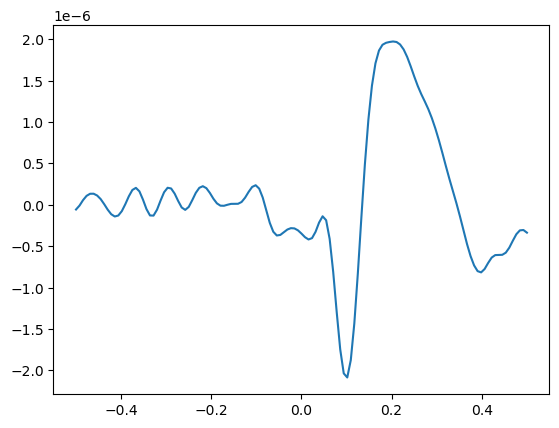

In [158]:
plt.plot(erp_times, erp_ave_allch)

In [159]:
num_additional_values = 100
step = erp_times[1] - erp_times[0]

erp_ave_allch_padded = np.pad(erp_ave_allch, (0, num_additional_values))

new_values = np.arange(erp_times[-1] + step, erp_times[-1] + (num_additional_values + 1) * step, step)

# original array plus new values
erp_times_padded = np.concatenate([erp_times, new_values])


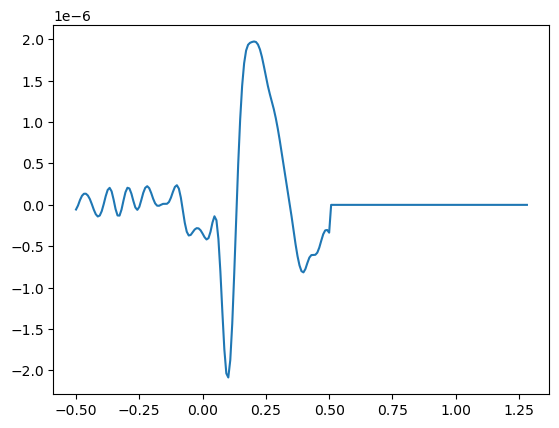

In [160]:
plt.plot(erp_times_padded, erp_ave_allch_padded)

### Perform continuous wavelet transform 

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_36921/2926160642.py:25: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 50)


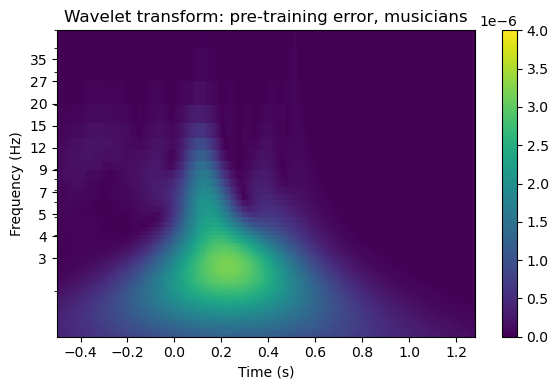

In [167]:

wavelet = "cmor1.5-0.6" #complex morlet wavelet: float numbers indicate bandwidth-center freq
vmax = 4e-6

#small bandwidth: poor freq resolution, better time localization
#large bandwidth: good freq resolution, poor time localization

# Use linear scale for scales
widths = np.linspace(1, 70, 70)
#sampling_period = np.diff(erp_times).mean()
sampling_period = erp_times[1] - erp_times[0]
cwtmatr, freqs = pywt.cwt(erp_ave_allch_padded, widths, wavelet, sampling_period=sampling_period)

#absolute value of complex result to extract magnitude info
cwtmatr = np.abs(cwtmatr[:-1, :-1])

# Plot result
fig, ax = plt.subplots(figsize=(6, 4))  # Adjust figure size as needed
pcm = ax.pcolormesh(erp_times_padded, freqs, cwtmatr, vmax = vmax)

# Set axis labels, title, and y-limit
ax.set_yscale('log')
ax.set_xlabel("Time (s)")
ax.set_ylabel("Frequency (Hz)")
ax.set_title(f"Wavelet transform: {period}-training {task}, {participants}")
ax.set_ylim(0, 50)

y_ticks = np.logspace(np.log10(3), np.log10(35), num=10)  # Adjust 'num' for more or fewer ticks
ax.set_yticks(y_ticks)
ax.get_yaxis().set_major_formatter(plt.ScalarFormatter())  # Optional: Ensure no scientific notation
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.0f'))  # No decimal places

# Add colorbar
fig.colorbar(pcm, ax=ax)

plt.tight_layout()


#### Visualize the wavelet

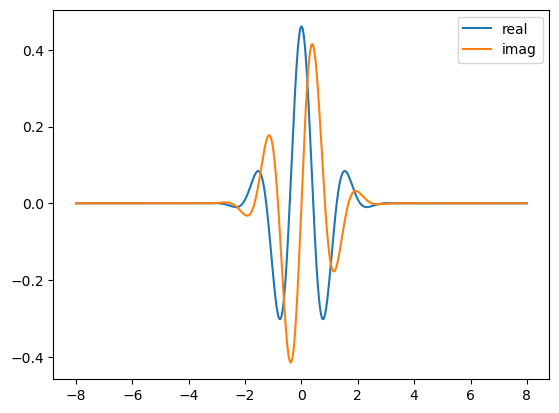

In [162]:
psi, x = pywt.ContinuousWavelet(wavelet).wavefun(10)
plt.plot(x, np.real(psi), label = 'real')
plt.plot(x, np.imag(psi), label = 'imag')
plt.legend()
